In [36]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
#Importing the CSV into dataframes
data = pd.read_csv("./Uber_Request_Data.csv")
#data.fillna("")
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
#Converting date string to timestamp
data['Request timestamp']=pd.to_datetime(data['Request timestamp'])
data['Drop timestamp']=pd.to_datetime(data['Drop timestamp'])

Most problematic route is: 
City to Airport


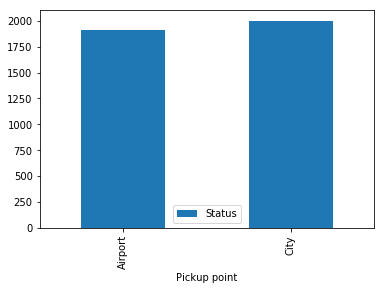

In [22]:
#Find the most problematic route....The most problematic route will be the one where for which more no. of times cars are unavailable
#and cab is being cancelled.

pickup_grouped = data.query('Status == "Cancelled" or Status=="No Cars Available"').groupby('Pickup point')
group_size=pickup_grouped['Status'].agg(len)
route = group_size.idxmax()
print("Most problematic route is: ")
if(route=='City'):
    print("City to Airport")
else:
    print("Airport to City")
    
problematic_route_table = pd.pivot_table(data.query('Status == "Cancelled" or Status=="No Cars Available"'), values='Status', index=['Pickup point'],
                                     aggfunc=len)
problematic_route_table.plot(kind='bar').figure

In [6]:
#Adding two new column request_time and filling the value in it
data['request_time']=np.nan
data['request_time'] = data['Request timestamp'].dt.time
data['request_time']=pd.to_timedelta(data['request_time'].astype(str))

Most problematic timeslot is: 
0 days 20:00:24


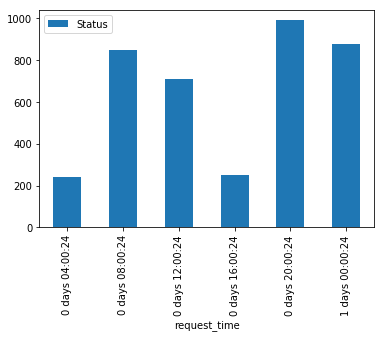

In [23]:
#Find the most problematic timeslot....The most problematic timeslot will be the one where for which more no. of times cars are unavailable
#and cab is being cancelled.

#GRoup_by time slot, 6 time slot to be made (4-8,8-12,12-16,16-20,20-00,00-4 in hrs)
timeslot_grouped = data.query('Status == "Cancelled" or Status=="No Cars Available"').groupby(pd.Grouper(key='request_time', freq='4H',base=4.0,label='left'))
group_size=timeslot_grouped['Status'].agg(len)
time_slot =  group_size.idxmax()
print("Most problematic timeslot is: ")
print(time_slot)
problematic_route_table = pd.pivot_table(data.query('Status == "Cancelled" or Status=="No Cars Available"'), values='Status', index=[pd.Grouper(key='request_time', freq='4H',base=4.0,label='left')],
                                     aggfunc=len)
problematic_route_table.plot(kind='bar').figure

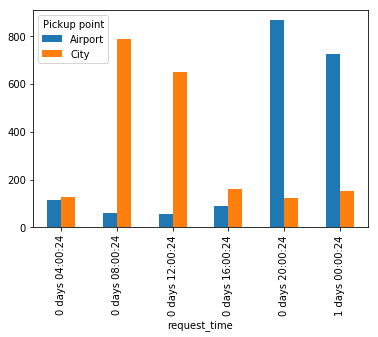

In [19]:
#Plotting the graph
supply_demand_table = pd.pivot_table(data.query('Status == "Cancelled" or Status=="No Cars Available"'), values='Status', index=[pd.Grouper(key='request_time', freq='4H',base=4.0,label='left')],
                                     columns=['Pickup point'], aggfunc=len)

supply_demand_table.plot(kind='bar').figure



Status                        Cancelled  No Cars Available
Pickup point request_time                                 
Airport      0 days 04:00:24        NaN              114.0
             0 days 08:00:24       15.0               44.0
             0 days 12:00:24       24.0               34.0
             0 days 16:00:24       36.0               55.0
             0 days 20:00:24       63.0              802.0
             1 days 00:00:24       60.0              664.0
City         0 days 04:00:24       14.0              112.0
             0 days 08:00:24      527.0              262.0
             0 days 12:00:24      405.0              245.0
             0 days 16:00:24       33.0              127.0
             0 days 20:00:24       42.0               82.0
             1 days 00:00:24       45.0              109.0


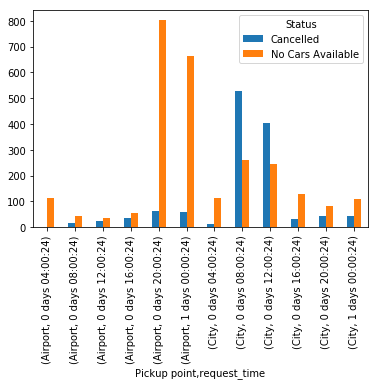

In [47]:
table = pd.pivot_table(data.query('Status == "Cancelled" or Status=="No Cars Available"'), values='Request id', index=[ 'Pickup point',pd.Grouper(key='request_time', freq='4H',base=4.0,label='left')],
...                     columns=['Status'], aggfunc=len)

print(table)
table.plot(kind='bar').figure
#table.unstack(level=1).plot(kind='bar', subplots=True).figure

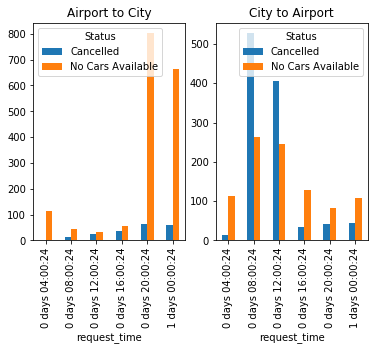

In [48]:
f, a = plt.subplots(1,2)
table.xs('Airport').plot(kind='bar',ax=a[0],title="Airport to City").figure
table.xs('City').plot(kind='bar',ax=a[1],title="City to Airport").figure